In [6]:
import tensorflow as tf ## pip install tensorflow
import cv2 ## pip install opencv-contrib-python
import numpy as np ## pip install numpy
import matplotlib.pyplot as plt  ## pip install matplotlib
import os

In [7]:
Datadirectory = "Training" ##training dataset


In [8]:
Classes = ["0","1","2","3","4","5","6"] ##List of classes=> exact name of your folders

## Testing By Printing a single image from folder '0'

In [9]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [10]:
img_array.shape #rgb

(48, 48, 3)

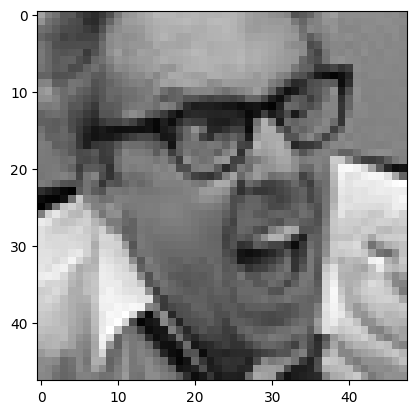

In [11]:
plt.imshow(img_array)

## Preprocessing Demo on a single image

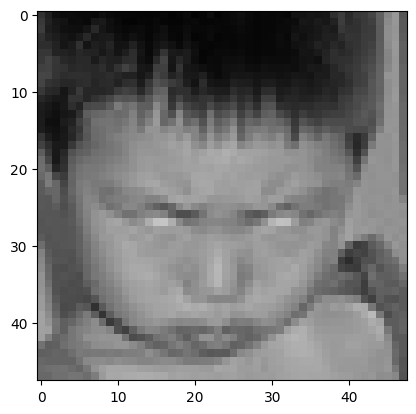

In [12]:
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

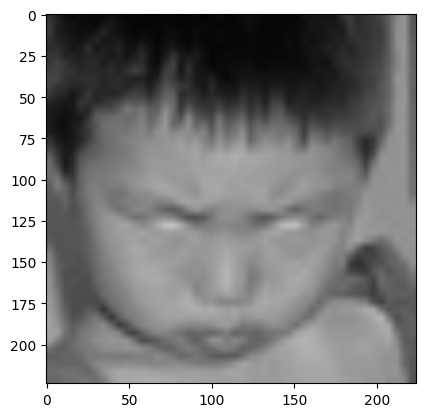

In [13]:
img_size=224 ##ImageNet => 224x224
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
new_array.shape
## Now the image size is changed as needed for the input into ImageNet CNN Architecture that we are gonna use

(224, 224, 3)

 # Read all images and convert them to array

In [15]:
training_Data=[] ##data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)  ## 0 1,  ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append( [new_array,class_num] )
            except Exception as e:
                pass
               
        
    

In [16]:
create_training_Data()
print(len(training_Data))

28709


In [17]:
import random ## shuffling the images into random order
random.shuffle(training_Data)

In [18]:
x = [] ## data/feature
y = [] ## label
for features,label in training_Data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimensions

In [19]:
x.shape  ## Changing the dimension because the deep learning architecture such as mobileNet requires 4 dimensions

(28709, 224, 224, 3)

In [20]:
# Normalizing the data
X = x/255.0
X.shape

MemoryError: Unable to allocate 32.2 GiB for an array with shape (28709, 224, 224, 3) and data type float64

In [24]:
x.shape

(28709, 224, 224, 3)

In [21]:
Y = np.array(y)
Y.shape

(28709,)

In [22]:
from collections import Counter


# Count the occurrences of each value
counts = Counter(Y)

# Print the counts
for value, count in counts.items():
    print(f"Value {value}: {count}")


Value 5: 3171
Value 4: 4830
Value 3: 7215
Value 2: 4097
Value 0: 3995
Value 6: 4965
Value 1: 436


# deep Learning model for training - Transfer Learning

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [26]:
model = tf.keras.applications.MobileNetV2() ## Pre-trained Model

In [27]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

# Transfer Learning - Tuning, weights will start from last check point

In [28]:
base_input = model.layers[0].input

In [29]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [30]:
base_ouput = model.layers[-2].output

In [31]:
base_ouput

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [32]:
final_output = layers.Dense(128)(base_ouput) ## adding new layer after output of global pooling layer
final_ouput  = layers.Activation('relu')(final_output) ## activation function
final_output = layers.Dense(64)(final_ouput)
final_ouput  = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput) ## we need 7 classes ## Classification layer

In [33]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [34]:
from tensorflow import keras
from tensorflow.keras.models import Model

new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [35]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"] )

In [ ]:
new_model.fit(X, Y, epochs=30)
new_model.save('fer_model_2.h5')
## Training is completed and model saved as a file names 'fer_model_2.h5' in base directory

## Testing the model

In [37]:
new_model = tf.keras.models.load_model('fer_model.h5')  ## Load the model saved after training from the previous step

In [38]:
frame = cv2.imread("happyboy.jpg")
frame.shape

(612, 612, 3)

## we need face detection algorithm (gray image)

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [41]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(612, 612)

In [43]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew] ## Cropping the face

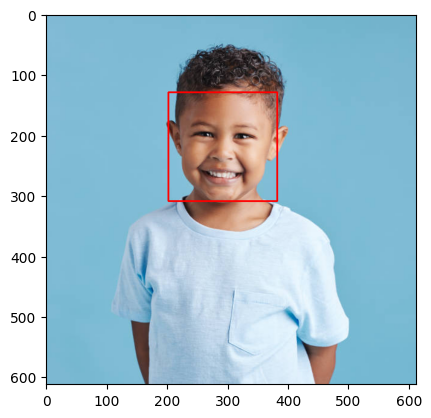

In [44]:
plt.imshow( cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

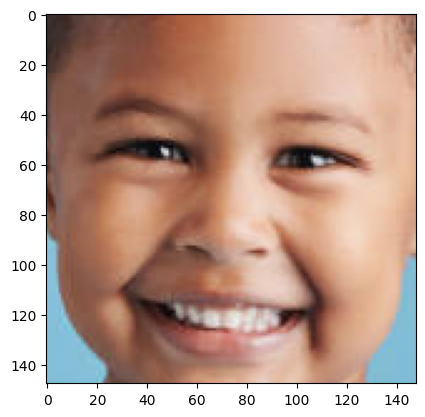

In [45]:
plt.imshow( cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [46]:
final_image = cv2.resize(face_roi,(224,224)) ## Converting to 224x224
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
final_image = final_image/255.0 ## normalizing

In [47]:
Predictions = new_model.predict(final_image)
Predictions[0]

1/1 [==============================] - 1s 1s/step


array([1.4990194e-09, 2.2581722e-12, 1.2654165e-11, 1.0000000e+00,
       1.1378544e-08, 4.3787104e-13, 6.9979675e-11], dtype=float32)

In [48]:
np.argmax(Predictions)

3